In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from sympy import diff
import sympy as sym

#  Домашнее задание

### Задание 

#### 1. Вычислить вектор градиента и матрицу Гессе для функции:
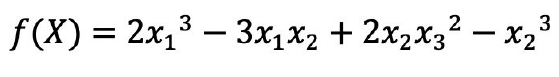
#### В точке M = (2, 1, 1).

In [214]:
x1 = sym.Symbol('x1')
x2 = sym.Symbol('x2')
x3 = sym.Symbol('x3')


f = 2 * x1**3 - 3 * x1 * x2 + 2 * x2 * x3**2 - x2**3
f

2*x1**3 - 3*x1*x2 - x2**3 + 2*x2*x3**2

In [215]:
# Нахождение частных производных функции трех переменных 

fx1 = f.diff(x1).subs([(x1, 2), (x2, 1), (x3, 1)])
fx2 = f.diff(x2).subs([(x1, 2), (x2, 1), (x3, 1)])
fx3 = f.diff(x3).subs([(x1, 2), (x2, 1), (x3, 1)])

print(f'df/dx1 = {f.diff(x1)}')
print(f'df/dx2 = {f.diff(x2)}')
print(f'df/dx3 = {f.diff(x3)}')

df/dx1 = 6*x1**2 - 3*x2
df/dx2 = -3*x1 - 3*x2**2 + 2*x3**2
df/dx3 = 4*x2*x3


In [216]:
# Вычисление вектора градиента в точке M = (2, 1, 1)

V1 = np.array([fx1, fx2, fx3])
print(f'Вектор градиента V1:  {V1}')

Вектор градиента V1:  [21 -7 4]


In [217]:
# Mатрица Гессе

fx1x1 = f.diff(x1, x1).subs([(x1, 2), (x2, 1), (x3, 1)])
fx1x2 = f.diff(x1, x2).subs([(x1, 2), (x2, 1), (x3, 1)])
fx1x3 = f.diff(x1, x3).subs([(x1, 2), (x2, 1), (x3, 1)])
fx2x2 = f.diff(x2, x2).subs([(x1, 2), (x2, 1), (x3, 1)])
fx2x3 = f.diff(x2, x3).subs([(x1, 2), (x2, 1), (x3, 1)])
fx3x3 = f.diff(x3, x3).subs([(x1, 2), (x2, 1), (x3, 1)])

print(f'fx1x1 = {f.diff(x1, x1)}')
print(f'fx1x2 = {f.diff(x1, x2)}')
print(f'fx1x3 = {f.diff(x1, x3)}')
print(f'fx2x2 = {f.diff(x2, x2)}')
print(f'fx2x3 = {f.diff(x2, x3)}')
print(f'fx3x3 = {f.diff(x3, x3)}')

# равенства из условия симметричности матрицы Гессе
fx2x1 = fx1x2
fx3x1 = fx1x3
fx2x3 = fx3x2      

fx1x1 = 12*x1
fx1x2 = -3
fx1x3 = 0
fx2x2 = -6*x2
fx2x3 = 4*x3
fx3x3 = 4*x2


In [218]:
# Вычисление матрицы Гессе в точке M = (2, 1, 1)

M1 = np.array([[fx1x1, fx1x2, fx1x3],[fx2x1,fx2x2, fx2x3], [fx3x1,fx3x2, fx3x3]])
print(f'Матрица М1: \n {M1}')

Матрица М1: 
 [[24 -3 0]
 [-3 -6 4]
 [0 4 4]]


#### 2. Постройте график трехмерный график функции:
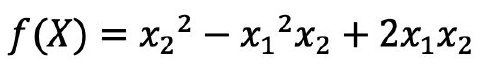
#### А также график линий уровня с уровнями {1, 5, 10}

In [219]:
x1 = sym.Symbol('x1')
x2 = sym.Symbol('x2')

x2 ** 2 - x1 ** 2 * x2 + 2 * x1 * x2

-x1**2*x2 + 2*x1*x2 + x2**2

In [220]:
# Постройте график трехмерный график функции

def func(x1, x2):
    return x2 ** 2 - x1 ** 2 * x2 + 2 * x1 * x2

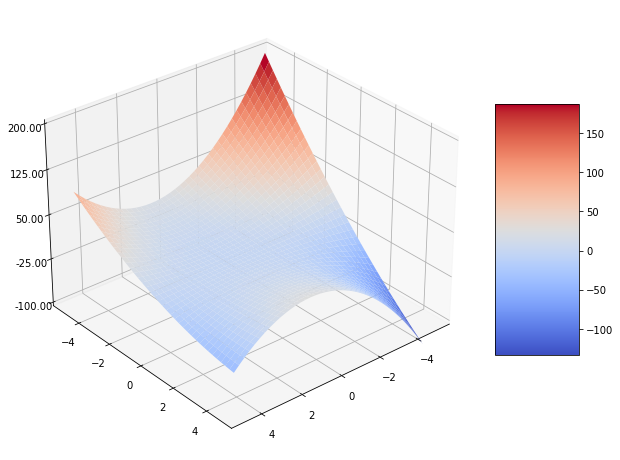

In [221]:
fig = plt.figure(figsize=(10.,35.))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = func(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(-100, 200)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.4, aspect=3)

ax.azim = 50
ax.dist = 10
ax.elev = 30

plt.show()

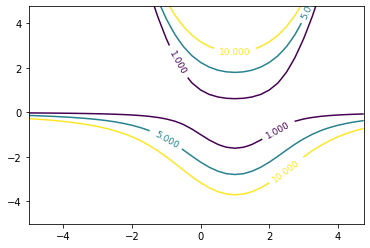

In [222]:
# А также график линий уровня с уровнями {1,5,10}

fig, ax = plt.subplots();
CS = ax.contour(X, Y, Z,[1,5,10]);
ax.clabel(CS, inline=True, fontsize=9);